# Introduction 

Customer segmentation is a crucial process in retail business analytics, enabling companies to group customers based on shared characteristics. By understanding these segments, businesses can tailor their marketing strategies, improve customer satisfaction, and increase profitability. 

In this analysis, we perform customer segmentation using K-Means clustering on a dataset containing key features such as Age, Annual Income, Spending Score, Tenure, and Purchases. These features provide insights into customer demographics, spending behavior, and purchasing history.

We will explore different segmentations using combinations of features, including:
- Age and Spending Score
- Annual Income and Spending Score
- Age, Annual Income, and `pending Score
- Tenure and Purchases

By identifying patterns and relationships within these clusters, we aim to derive actionable insights that will help the retail business optimize its marketing efforts, enhance customer loyalty, and drive revenue growth.

In [123]:
# importing the necessary libraries 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [124]:
#importing the csv file for the analysis
df = pd.read_csv(r'C:\Users\asus\Downloads\retail store data.csv')

### Schemas
1. **Age**: Represents the age of customers, providing insights into different life-stage spending behaviors.
2. **Annual Income**: Shows customers' yearly income, indicating their purchasing power.
3. **Spending Score**: A measure (1-100) of how much customers spend, helping identify valuable shoppers.
4. **Tenure**: The duration (in years or months) a customer has been with the store, indicating loyalty.
5. **Purchases**: The total number of purchases made, reflecting customer engagement and shopping frequency.


### Step 1. Data Exploration

In this section, we explored the dataset to understand its structure and the variables involved. We checked for missing values and got a sense of the data by looking at basic descriptive statistics.
Key features like Age, Annual Income, and Spending Score are the main variables used for clustering customers. These features provide insights into customer demographics and spending behavior.

In [93]:
df.shape

(5000, 9)

In [94]:
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Tenure,Purchases,Product_Bought,Category
0,1,Male,75,38354,35,3,37,Cologne,Fragrance
1,2,Female,31,42190,14,17,20,Lipstick,Makeup
2,3,Male,48,26142,14,18,2,Razor,Shaving
3,4,Male,34,48398,10,18,36,Shampoo,Haircare
4,5,Male,48,71971,12,2,15,Beard Trimmer,Shaving


In [95]:
df.describe

<bound method NDFrame.describe of       CustomerID  Gender  Age  Annual_Income  Spending_Score  Tenure  \
0              1    Male   75          38354              35       3   
1              2  Female   31          42190              14      17   
2              3    Male   48          26142              14      18   
3              4    Male   34          48398              10      18   
4              5    Male   48          71971              12       2   
...          ...     ...  ...            ...             ...     ...   
4995        4996    Male   21         113450              69      16   
4996        4997  Female   32         106437              62       9   
4997        4998    Male   26         126311               4       1   
4998        4999  Female   16          54409              86      15   
4999        5000  Female   64         135159              18      12   

      Purchases Product_Bought   Category  
0            37        Cologne  Fragrance  
1            

In [96]:
df.dtypes

CustomerID         int64
Gender            object
Age                int64
Annual_Income      int64
Spending_Score     int64
Tenure             int64
Purchases          int64
Product_Bought    object
Category          object
dtype: object

In [97]:
df.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
Tenure            0
Purchases         0
Product_Bought    0
Category          0
dtype: int64

### Step 2: Data Visualization

Data visualization helps us understand the distribution of key variables and relationships between different features. In this section, we generate various plots to visualize the data before performing clustering. This includes histograms, count plots, and scatter plots to observe trends and patterns.

### 1. **Histogram**:
   - We plot histograms for Age, Annual Income, and Spending Score to understand the distribution of these features.
   - **Age**: This plot shows the age distribution of customers, helping us see which age groups dominate.
   - **Annual Income**: A histogram of annual income shows us how income is distributed across customers. This can help identify the presence of high-income or low-income groups.
   - **Spending Score**: This plot reveals the spread of spending behavior across customers, helping to identify high- or low-spending customer segments.


Text(0.5, 1.0, 'Distribution of Age')

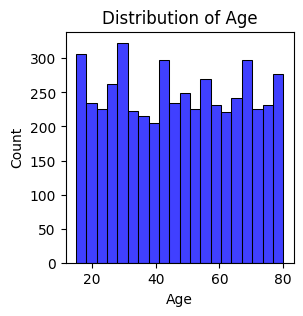

In [98]:
plt.figure(figsize=(10,3))

plt.subplot(1, 3, 1)
sns.histplot(df['Age'], bins=20, color='blue')
plt.title('Distribution of Age')

Text(0.5, 1.0, 'Distribution of Annual Income (k$)')

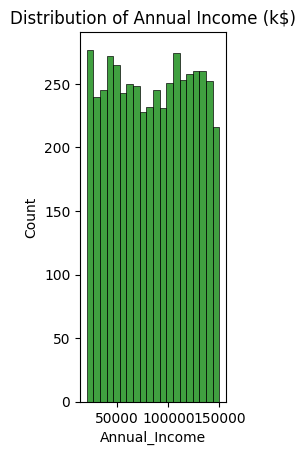

In [99]:
plt.subplot(1, 3, 2)
sns.histplot(df['Annual_Income'], bins=20, color='green')
plt.title('Distribution of Annual Income (k$)')

Text(0.5, 1.0, 'Distribution of Spending Score')

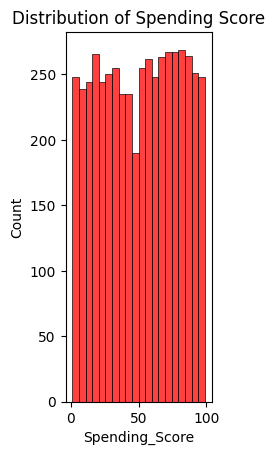

In [100]:
plt.subplot(1, 3, 3)
sns.histplot(df['Spending_Score'], bins=20, color='red')
plt.title('Distribution of Spending Score')

### 2. **Count Plot of Gender**:
   - We use a count plot to visualize the distribution of gender in the dataset.
   - This helps in understanding the balance between male and female customers, which can guide gender-specific marketing strategies.


Text(0.5, 1.0, 'Count of Customers by Gender')

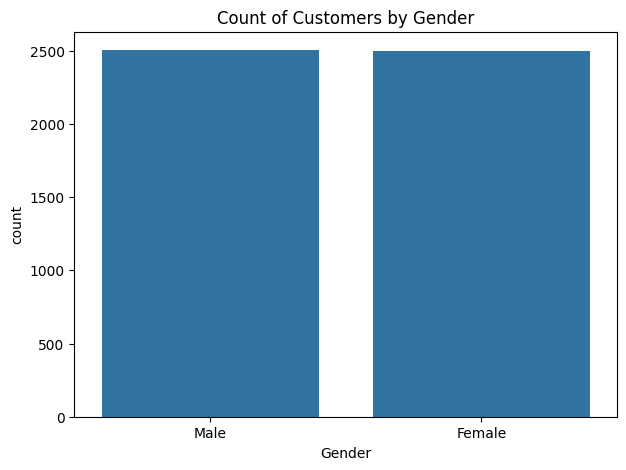

In [101]:
plt.figure(figsize=(7,5))
sns.countplot(x='Gender', data=df)
plt.title('Count of Customers by Gender')

### 3. **Relation Between Age, Annual Income, and Spending Score**:
   - We create scatter plots to visualize the relationships between:
     - **Age and Spending Score**: This plot helps us observe whether younger or older customers tend to spend more.
     - **Annual Income and Spending Score**: This plot shows how spending behavior correlates with income, which is important for understanding purchasing power.
     - **Age and Annual Income**: This shows if income varies significantly across different age groups.


Text(0.5, 1.0, 'Relation between Age and Spending Score')

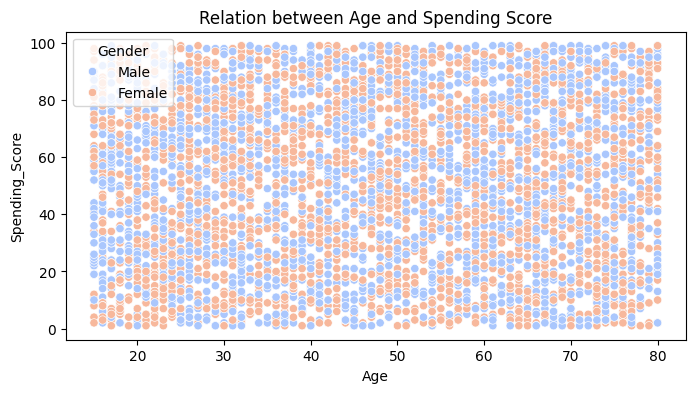

In [102]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='Age', y='Spending_Score', data=df, hue='Gender', palette='coolwarm')
plt.title('Relation between Age and Spending Score')

Text(0.5, 1.0, 'Relation between Annual Income and Spending Score')

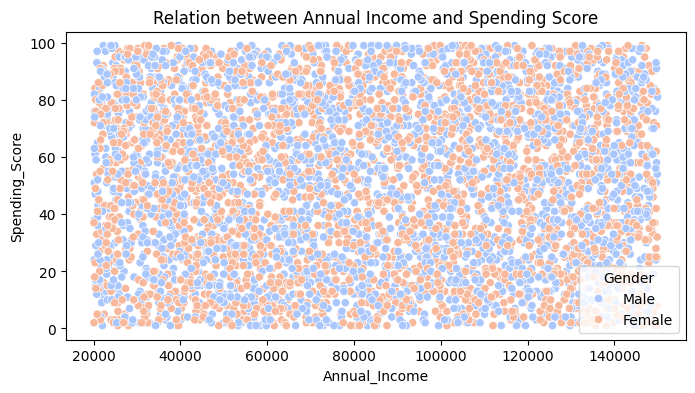

In [103]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='Annual_Income', y='Spending_Score', data=df, hue='Gender', palette='coolwarm')
plt.title('Relation between Annual Income and Spending Score')

### 4. **Distribution of Age, Annual Income, and Spending Score by Gender**:
   - We plot the distribution of Age, Annual Income, and Spending Score separately for male and female customers.
   - This helps us determine if there are significant differences in spending behavior, income levels, or age distribution between genders. 
   - It provides insights for gender-specific marketing strategies or promotions that cater to the unique needs of each group.

Through these visualizations, we gain a deeper understanding of customer demographics and behaviors, helping us to better inform the clustering process and segmentation strategies.

Text(0.5, 1.0, 'Age Distribution by Gender')

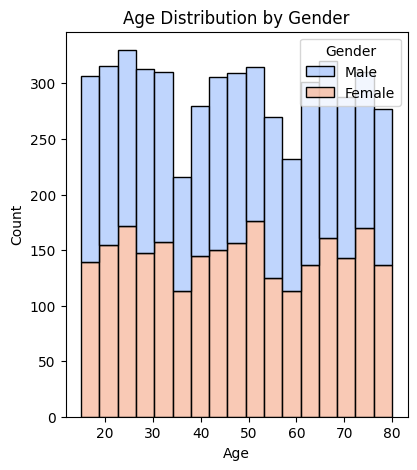

In [104]:
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
sns.histplot(data=df, x="Age", hue="Gender", multiple="stack", palette="coolwarm")
plt.title('Age Distribution by Gender')

Text(0.5, 1.0, 'Annual Income Distribution by Gender')

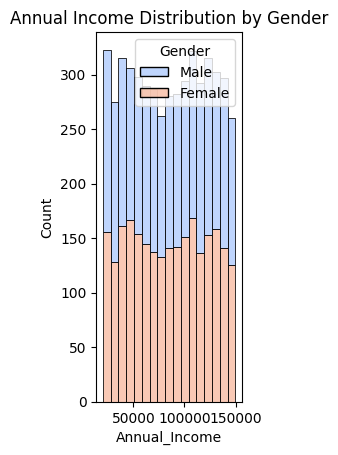

In [105]:
plt.subplot(1, 3, 2)
sns.histplot(data=df, x="Annual_Income", hue="Gender", multiple="stack", palette="coolwarm")
plt.title('Annual Income Distribution by Gender')

Text(0.5, 1.0, 'Spending Score Distribution by Gender')

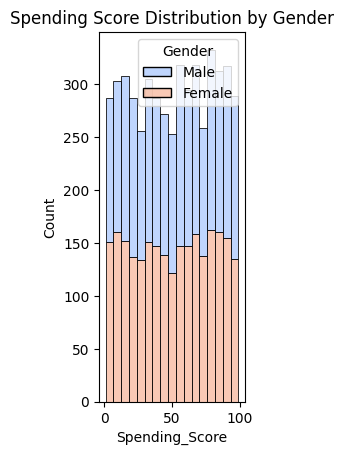

In [106]:
plt.subplot(1, 3, 3)
sns.histplot(data=df, x="Spending_Score", hue="Gender", multiple="stack", palette="coolwarm")
plt.title('Spending Score Distribution by Gender')

### Clustering using K- means

In [107]:
features = df[['Age', 'Annual_Income', 'Spending_Score', 'Tenure', 'Purchases']]

In [108]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [109]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)


#### Finding the Elbow point

In [110]:
title = "Customer Segmentation Analysis Using K-Means Clustering on Retail Store Data"

In [111]:
# Function to plot Elbow Method
def plot_elbow(features_scaled, title):
    inertia = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(features_scaled)
        inertia.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

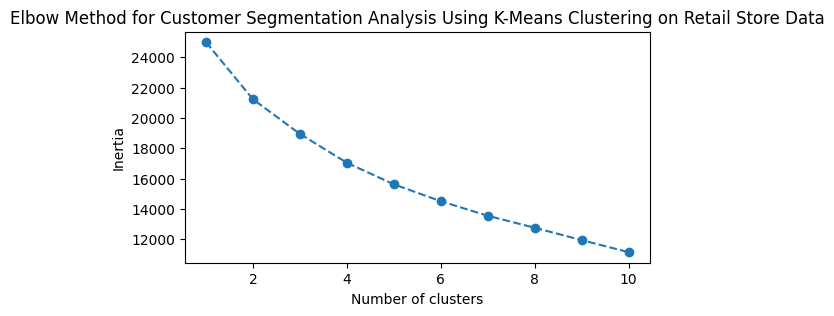

In [112]:
plt.figure(figsize=(6,3))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title(f'Elbow Method for {title}')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

Segmentation using Age and Spending Score

In [126]:
X_age_spend = df[['Age', 'Spending_Score']]

# Standardizing
X_age_spend_scaled = scaler.fit_transform(X_age_spend)

# Elbow method to find optimal number of clusters for Age and Spending Score
plot_elbow(X_age_spend_scaled, 'Age and Spending Score')

# Let's assume the optimal clusters are 4 from the elbow method
kmeans_age_spend = KMeans(n_clusters=4, init='k-means++', random_state=42)
df['Cluster_Age_Spend'] = kmeans_age_spend.fit_predict(X_age_spend_scaled)

We performed K-Means clustering using Age and Spending Score. This clustering helps us group customers based on their age and spending behavior.

- **Cluster 0**: Young customers with low spending scores.
- **Cluster 1**: Older customers with moderate spending scores.
- **Cluster 2**: Young customers with high spending scores.
- **Cluster 3**: Older customers with high spending scores.

Text(0.5, 1.0, 'Customer Segmentation Based on Age and Spending Score')

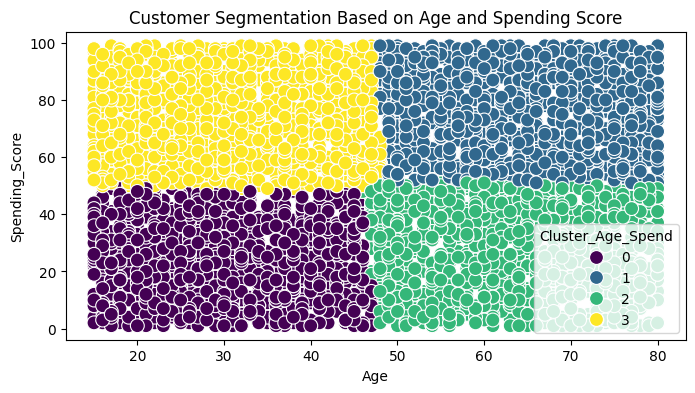

In [114]:
# Visualizing the clusters
plt.figure(figsize=(8,4))
sns.scatterplot(x='Age', y='Spending_Score', data=df, hue='Cluster_Age_Spend', palette='viridis', s=100)
plt.title('Customer Segmentation Based on Age and Spending Score')

#### **Insight**: Younger customers tend to either spend very little or a lot, showing polarization. Older customers tend to have more stable, moderate spending behavior.

Segmentation using Annual Income and Spending Score

In [125]:
X_income_spend = df[['Annual_Income', 'Spending_Score']]

# Standardizing
X_income_spend_scaled = scaler.fit_transform(X_income_spend)

# Elbow method for Annual Income and Spending Score
plot_elbow(X_income_spend_scaled, 'Annual Income and Spending Score')

# Assuming 5 clusters based on the Elbow method
kmeans_income_spend = KMeans(n_clusters=5, init='k-means++', random_state=42)
df['Cluster_Income_Spend'] = kmeans_income_spend.fit_predict(X_income_spend_scaled)

We clustered customers using Annual Income and Spending Score to understand the relationship between income and customer spending.

- **Cluster 0**: High-income, low-spending customers.
- **Cluster 1**: Middle-income, moderate-spending customers.
- **Cluster 2**: Low-income, low-spending customers.
- **Cluster 3**: Low-income, high-spending customers.
- **Cluster 4**: High-income, high-spending customers.

Text(0.5, 1.0, 'Customer Segmentation Based on Annual Income and Spending Score')

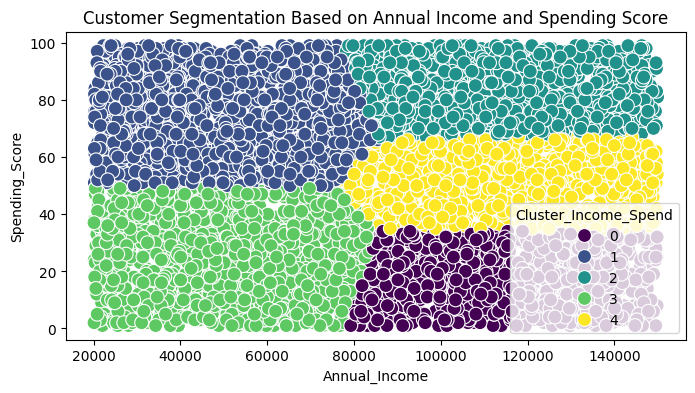

In [116]:
# Visualizing the clusters
plt.figure(figsize=(8,4))
sns.scatterplot(x='Annual_Income', y='Spending_Score', data=df, hue='Cluster_Income_Spend', palette='viridis', s=100)
plt.title('Customer Segmentation Based on Annual Income and Spending Score')

#### **Insight**: Customers with high income and high spending scores represent valuable segments for the business, whereas low-income and low-spending customers may require different marketing strategies. Some high-income customers are spending less, indicating untapped potential.

Segmentation using Age, Annual Income, and Spending Score

In [117]:
X_age_income_spend = df[['Age', 'Annual_Income', 'Spending_Score']]

# Standardizing
X_age_income_spend_scaled = scaler.fit_transform(X_age_income_spend)

# Elbow method for Age, Annual Income, and Spending Score
plot_elbow(X_age_income_spend_scaled, 'Age, Annual Income, and Spending Score')

# Assuming 5 clusters based on the Elbow method
kmeans_age_income_spend = KMeans(n_clusters=5, init='k-means++', random_state=42)
df['Cluster_Age_Income_Spend'] = kmeans_age_income_spend.fit_predict(X_age_income_spend_scaled)

We performed 3D clustering using Age, Annual Income, and Spending Score. This allows us to get a holistic view of customers considering three critical factors together.

- **Cluster 0**: Young, middle-income, high-spending customers.
- **Cluster 1**: Older, high-income, moderate-spending customers.
- **Cluster 2**: Young, low-income, low-spending customers.
- **Cluster 3**: Older, middle-income, high-spending customers.
- **Cluster 4**: Middle-aged, high-income, high-spending customers.

Text(0.5, 0.92, 'Customer Segmentation Based on Age, Annual Income, and Spending Score')

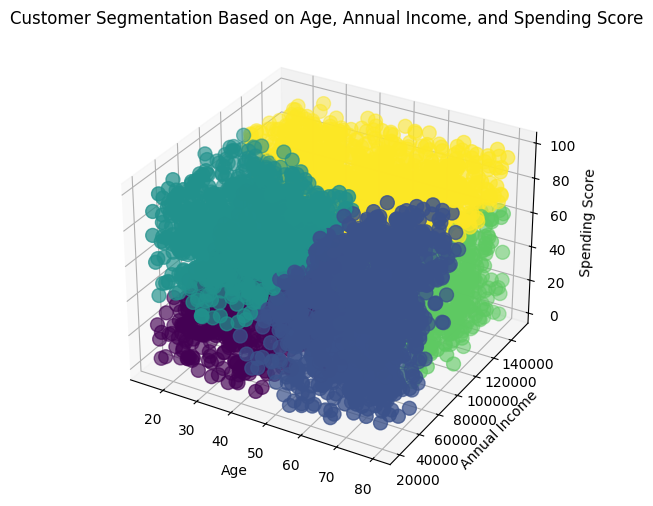

In [118]:
# Visualizing in 3D
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['Annual_Income'], df['Spending_Score'], c=df['Cluster_Age_Income_Spend'], cmap='viridis', s=100)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.title('Customer Segmentation Based on Age, Annual Income, and Spending Score')

#### **Insight**: High-income, high-spending customers across all age groups should be the focus for loyalty programs and premium offers. Young, low-income customers may benefit from promotions to increase their spending.

Segmentation using Tenure and Purchases

In [127]:
X_tenure_purchases = df[['Tenure', 'Purchases']]

# Standardizing
X_tenure_purchases_scaled = scaler.fit_transform(X_tenure_purchases)

# Elbow method for Tenure and Purchases
plot_elbow(X_tenure_purchases_scaled, 'Tenure and Purchases')

# Assuming 3 clusters based on the Elbow method
kmeans_tenure_purchases = KMeans(n_clusters=3, init='k-means++', random_state=42)
df['Cluster_Tenure_Purchases'] = kmeans_tenure_purchases.fit_predict(X_tenure_purchases_scaled)

By clustering customers based on Tenure and Purchases, we can identify how long customers have been with the business and their purchasing patterns.

- **Cluster 0**: Long-term customers with high purchases.
- **Cluster 1**: Short-term customers with moderate purchases.
- **Cluster 2**: Long-term customers with low purchases.

Text(0.5, 1.0, 'Customer Segmentation Based on Tenure and Purchases')

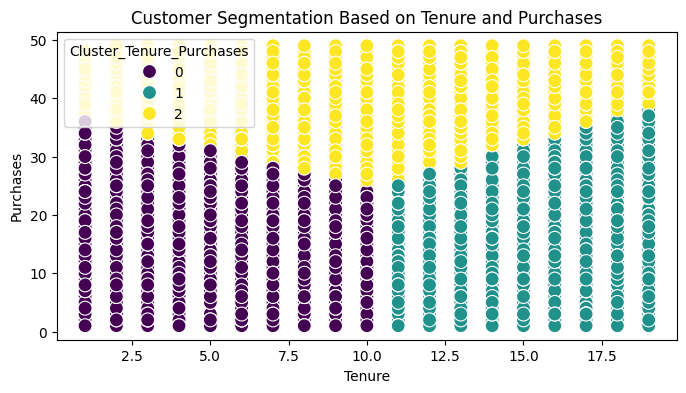

In [120]:
# Visualizing the clusters
plt.figure(figsize=(8,4))
sns.scatterplot(x='Tenure', y='Purchases', data=df, hue='Cluster_Tenure_Purchases', palette='viridis', s=100)
plt.title('Customer Segmentation Based on Tenure and Purchases')

#### **Insight**: Long-term customers with high purchases represent loyal customers. However, the long-term, low-purchasing customers may require re-engagement strategies to encourage more spending. Short-term customers can be targeted with retention offers.

Segmentation using Age, Tenure, and Purchases

In [121]:
X_age_tenure_purchases = df[['Age', 'Tenure', 'Purchases']]

# Standardizing
X_age_tenure_purchases_scaled = scaler.fit_transform(X_age_tenure_purchases)

# Elbow method for Age, Tenure, and Purchases
plot_elbow(X_age_tenure_purchases_scaled, 'Age, Tenure, and Purchases')

# Assuming 4 clusters based on the Elbow method
kmeans_age_tenure_purchases = KMeans(n_clusters=4, init='k-means++', random_state=42)
df['Cluster_Age_Tenure_Purchases'] = kmeans_age_tenure_purchases.fit_predict(X_age_tenure_purchases_scaled)

In this section, we performed K-Means clustering using Age, Tenure, and Purchases to identify customer segments based on their age, how long they've been with the business, and their purchase frequency.

- **Cluster 0**: Younger customers with short tenure and frequent purchases.
- **Cluster 1**: Older customers with long tenure and moderate purchases.
- **Cluster 2**: Middle-aged customers with long tenure but low purchases.
- **Cluster 3**: Younger customers with moderate tenure and frequent purchases.

Text(0.5, 0.92, 'Customer Segmentation Based on Age, Tenure, and Purchases')

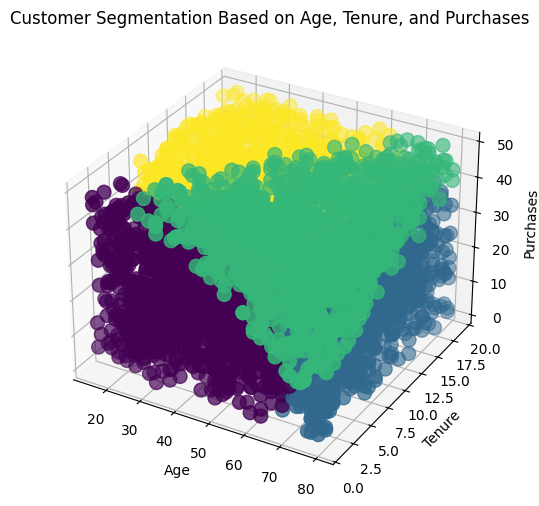

In [122]:
# Visualizing in 3D
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['Tenure'], df['Purchases'], c=df['Cluster_Age_Tenure_Purchases'], cmap='viridis', s=100)
ax.set_xlabel('Age')
ax.set_ylabel('Tenure')
ax.set_zlabel('Purchases')
plt.title('Customer Segmentation Based on Age, Tenure, and Purchases')

#### **Insight**: 
- Younger customers with high purchase frequency and short tenure represent a growing segment that can be nurtured with retention strategies.
- Long-term customers with moderate or low purchases may require re-engagement offers or loyalty incentives to encourage higher spending.
- The business can focus on converting younger, high-purchase customers into long-term loyal shoppers by offering personalized services and targeted promotions.

### Overall Insights and Suggestions for the Retail Business:


1. **High-Spending Segments**: High-income, high-spending customers (Cluster 4 in the Annual Income & Spending Score segment) should be the focus of premium services, loyalty programs, and exclusive offers. These are the most valuable customers.

2. **Young Customers**: Young customers, especially those with high spending scores, show a lot of potential for future business growth. Engaging them with trendy products, social media campaigns, and influencer marketing can further increase their loyalty.

3. **Untapped High-Income Customers**: Some high-income customers are spending less than expected. Personalized marketing strategies and offering them premium services may increase their spending.

4. **Retention Strategy**: Long-term customers with low purchases represent a risk of churn. Consider implementing re-engagement strategies such as personalized discounts or targeted email campaigns to encourage more spending.

5. **Low-Income Customers**: Low-income customers with high spending scores may be more price-sensitive, so offering them discounts, promotions, or budget-friendly product bundles could increase their satisfaction and loyalty.

6. **Customer Segmentation for Personalization**: Each segment can be targeted with personalized marketing campaigns:
   - Premium offers for high-income, high-spending customers.
   - Budget-friendly promotions for low-income, high-spending customers.
   - Re-engagement offers for long-term, low-spending customers.

### Conclusion:
By applying K-Means clustering to this retail customer dataset, we’ve identified distinct customer segments that can help the business tailor its marketing and sales strategies. The business should focus on its most valuable customers (high-income, high-spending) while also working to increase spending from low-income or untapped high-income customers. Personalized customer experiences and targeted marketing can help improve customer loyalty and overall profitability.
